##Problem - 1: Perform a classification task with knn from scratch.

###1. Load the Dataset:

  • Read the dataset into a pandas DataFrame.

  • Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset
(e.g., check data types, missing values, summary statistics).

###2. Handle Missing Data:

  • Handle any missing values appropriately, either by dropping or imputing them based on the data.



In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
data =pd.read_csv("/content/drive/MyDrive/Concept of AI/5CS037 - Cohort 11+12 - 2024 - Materials/Week -4-  Introduction to Learning Theory for Machine Learning/Dataset/diabetes.csv")
data.head()

print("\nData Types:")
print(data.dtypes)

print("\nMissing Values:")
print(data.isnull().sum())

print("\nSummary Statistics:")
print(data.describe())






Data Types:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Missing Values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Summary Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.

####Box plot

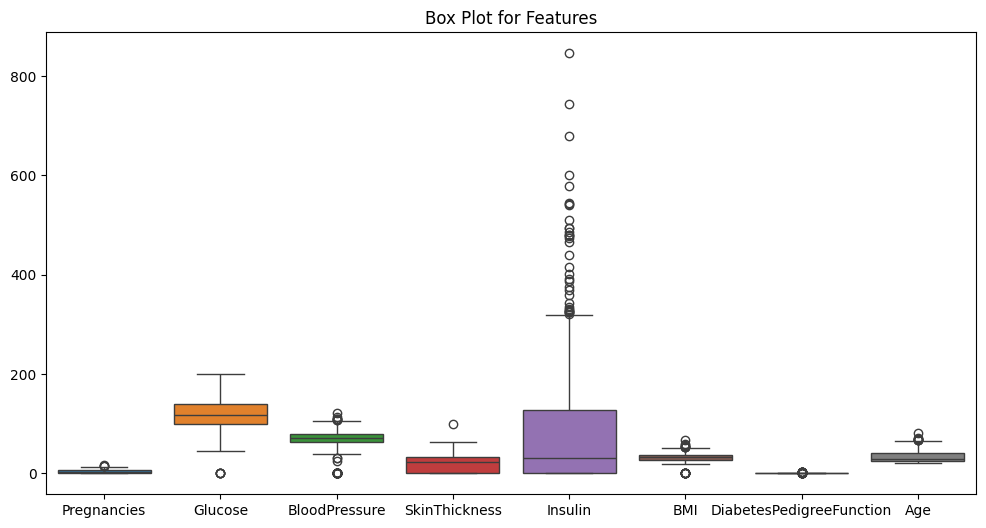

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.boxplot(data=data.iloc[:, :-1])
plt.title('Box Plot for Features')
plt.show()

####Histogram

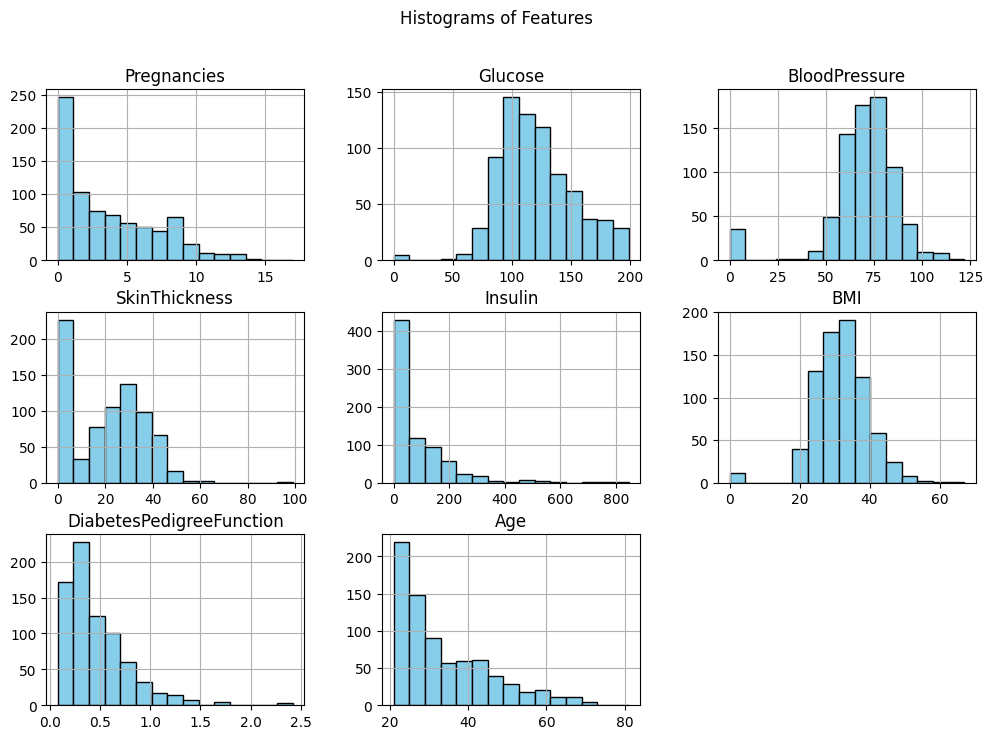

In [4]:

data.iloc[:, :-1].hist(figsize=(12, 8), bins=15, color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Features')
plt.show()


####Heatmap

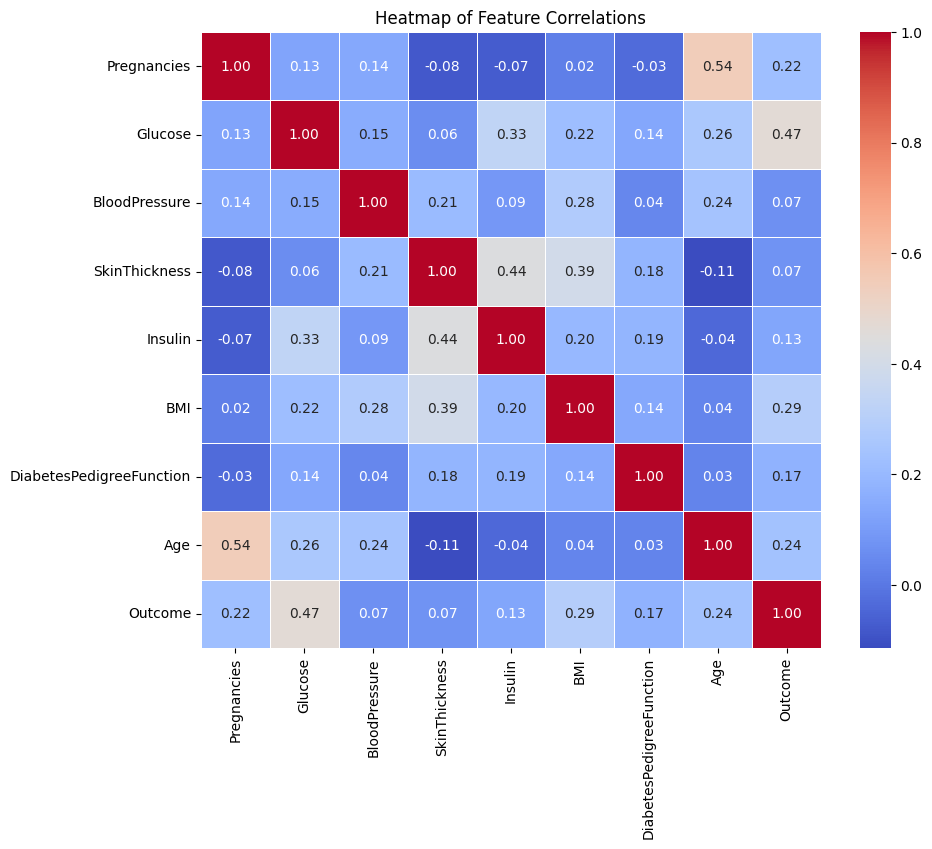

In [5]:
# Compute correlation matrix
corr_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Feature Correlations')
plt.show()


### 3.Feature Engineering:


In [6]:
X = data.drop(columns=['Outcome']).values
y = data['Outcome'].values
def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    """
    Splits dataset into train and test sets.

    Arguments:
    X : np.ndarray
        Feature matrix.
    y : np.ndarray
        Target array.
    test_size : float
        Proportion of the dataset to include in the test split (0 < test_size < 1).
    random_seed : int
        Seed for reproducibility.

    Returns:
    X_train, X_test, y_train, y_test : np.ndarray
        Training and testing splits of features and target.
    """
    np.random.seed(random_seed)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)  # Shuffle the indices

    test_split_size = int(len(X) * test_size)
    test_indices = indices[:test_split_size]
    train_indices = indices[test_split_size:]

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = train_test_split_scratch(X, y, test_size=0.3)


print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (538, 8)
Shape of X_test: (230, 8)
Shape of y_train: (538,)
Shape of y_test: (230,)


In [7]:
def euclidean_distance(point1, point2):
    """
    Calculate the Euclidean distance between two points in n-dimensional space.

    Arguments:
    point1 : np.ndarray
        The first point as a numpy array.
    point2 : np.ndarray
        The second point as a numpy array.

    Returns:
    float
        The Euclidean distance between the two points.

    Raises:
    ValueError: If the input points do not have the same dimensionality.
    """

    if point1.shape != point2.shape:
        raise ValueError("Points must have the same dimensions to calculate Euclidean distance.")


    distance = np.sqrt(np.sum((point1 - point2) ** 2))
    return distance


In [8]:
try:

    point1 = np.array([3, 4])
    point2 = np.array([0, 0])


    result = euclidean_distance(point1, point2)


    expected_result = 5.0
    assert np.isclose(result, expected_result), f"Expected {expected_result}, but got {result}"

    print("Test passed successfully!")
except ValueError as ve:
    print(f"ValueError: {ve}")
except AssertionError as ae:
    print(f"AssertionError: {ae}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Test passed successfully!


In [9]:
def knn_predict_single(query, X_train, y_train, k=3):
    """
    Predict the class label for a single query using the K-nearest neighbors algorithm.

    Arguments:
    query : np.ndarray
        The query point for which the prediction is to be made.
    X_train : np.ndarray
        The training feature matrix.
    y_train : np.ndarray
        The training labels.
    k : int, optional
        The number of nearest neighbors to consider (default is 3).

    Returns:
    int
        The predicted class label for the query.
    """

    distances = [euclidean_distance(query, x) for x in X_train]


    sorted_indices = np.argsort(distances)


    nearest_indices = sorted_indices[:k]


    nearest_labels = y_train[nearest_indices]


    prediction = np.bincount(nearest_labels).argmax()

    return prediction


In [10]:
def knn_predict(X_test, X_train, y_train, k=3):
    """
    Predict the class labels for all test samples using the K-nearest neighbors algorithm.

    Arguments:
    X_test : np.ndarray
        The test feature matrix.
    X_train : np.ndarray
        The training feature matrix.
    y_train : np.ndarray
        The training labels.
    k : int, optional
        The number of nearest neighbors to consider (default is 3).

    Returns:
    np.ndarray
        An array of predicted class labels for the test samples.
    """

    predictions = [knn_predict_single(x, X_train, y_train, k) for x in X_test]
    return np.array(predictions)


In [11]:
try:
    # Use a small subset of the test set for validation
    X_test_sample = X_test[:5]
    y_test_sample = y_test[:5]

    # Perform predictions on the test sample
    predictions = knn_predict(X_test_sample, X_train, y_train, k=3)

    # Output the predictions and actual labels
    print("Predictions:", predictions)
    print("Actual labels:", y_test_sample)

    # Check if predictions match the shape of the true labels
    assert predictions.shape == y_test_sample.shape, (
        "The shape of predictions does not match the shape of the actual labels."
    )

    print("Test case passed successfully!")

except AssertionError as ae:
    print(f"AssertionError: {ae}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Predictions: [0 1 0 1 1]
Actual labels: [0 0 0 0 0]
Test case passed successfully!


In [12]:
def compute_accuracy(y_true, y_pred):
    """
    Compute the accuracy of predictions.

    Arguments:
    y_true : np.ndarray
        The true labels.
    y_pred : np.ndarray
        The predicted labels.

    Returns:
    float
        The accuracy as a percentage (0 to 100).
    """
    correct_predictions = np.sum(y_true == y_pred)
    total_predictions = len(y_true)
    accuracy = (correct_predictions / total_predictions) * 100
    return accuracy



try:

    predictions = knn_predict(X_test, X_train, y_train, k=3)


    accuracy = compute_accuracy(y_test, predictions)


    print(f"Accuracy of the KNN model on the test set: {accuracy:.2f}%")
except Exception as e:
    print(f"An unexpected error occurred during prediction or accuracy computation: {e}")


Accuracy of the KNN model on the test set: 67.39%


Accuracy for k=1: 68.70%
Accuracy for k=2: 72.61%
Accuracy for k=3: 67.39%
Accuracy for k=4: 72.17%
Accuracy for k=5: 68.70%
Accuracy for k=6: 70.00%
Accuracy for k=7: 69.13%
Accuracy for k=8: 71.30%
Accuracy for k=9: 70.00%
Accuracy for k=10: 71.74%
Accuracy for k=11: 73.04%
Accuracy for k=12: 73.91%
Accuracy for k=13: 74.35%
Accuracy for k=14: 72.61%
Accuracy for k=15: 73.91%
Accuracy for k=16: 73.48%
Accuracy for k=17: 72.61%
Accuracy for k=18: 71.30%
Accuracy for k=19: 72.17%
Accuracy for k=20: 70.87%


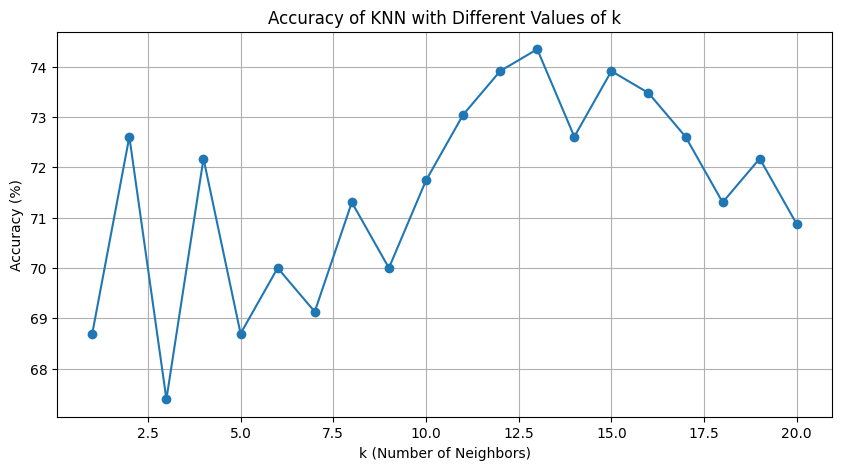

Experiment completed. Check the plot for the accuracy trend.


In [13]:
import matplotlib.pyplot as plt
def experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values):
    """
    Run KNN predictions for different values of k and plot the accuracies.

    Arguments:
    X_train : np.ndarray
        The training feature matrix.
    y_train : np.ndarray
        The training labels.
    X_test : np.ndarray
        The test feature matrix.
    y_test : np.ndarray
        The test labels.
    k_values : list of int
        A list of k values to experiment with.

    Returns:
    dict
        A dictionary with k values as keys and their corresponding accuracies as values.
    """
    accuracies = {}

    for k in k_values:

        predictions = knn_predict(X_test, X_train, y_train, k)

        accuracy = compute_accuracy(y_test, predictions)
        accuracies[k] = accuracy

        print(f"Accuracy for k={k}: {accuracy:.2f}%")


    plt.figure(figsize=(10, 5))
    plt.plot(k_values, list(accuracies.values()), marker='o')
    plt.xlabel('k (Number of Neighbors)')
    plt.ylabel('Accuracy (%)')
    plt.title('Accuracy of KNN with Different Values of k')
    plt.grid(True)
    plt.show()

    return accuracies


k_values = range(1, 21)


try:
    accuracies = experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values)
    print("Experiment completed. Check the plot for the accuracy trend.")
except Exception as e:
    print(f"An unexpected error occurred during the experiment: {e}")


##Problem - 2 - Experimentation:
###1. Repeat the Classification Task:

  • Scale the Feature matrix X.
  
  • Use the scaled data for training and testing the kNN Classifier.

  • Record the results.
###2. Comparative Analysis: Compare the Results -

  • Compare the accuracy and performance of the kNN model on the original dataset from problem 1
versus the scaled dataset.

  • Discuss:

–
How scaling impacted the KNN performance.

– The reason for any observed changes in accuracy.

Accuracy on original dataset: 67.39%
Accuracy on scaled dataset: 70.87%


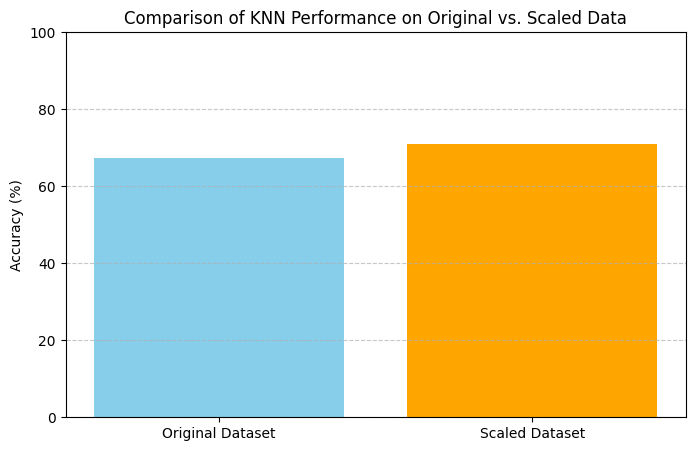

Scaling improved the KNN model's performance.


In [14]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Scale the Feature Matrix
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Train and Test KNN on Scaled Data

# Accuracy on original dataset
predictions_original = knn_predict(X_test, X_train, y_train, k=3)
accuracy_original = compute_accuracy(y_test, predictions_original)

# Accuracy on scaled dataset
predictions_scaled = knn_predict(X_test_scaled, X_train_scaled, y_train, k=3)
accuracy_scaled = compute_accuracy(y_test, predictions_scaled)

# Step 3: Display Results
print(f"Accuracy on original dataset: {accuracy_original:.2f}%")
print(f"Accuracy on scaled dataset: {accuracy_scaled:.2f}%")

# Step 4: Visualization
datasets = ['Original Dataset', 'Scaled Dataset']
accuracies = [accuracy_original, accuracy_scaled]

plt.figure(figsize=(8, 5))
plt.bar(datasets, accuracies, color=['skyblue', 'orange'])
plt.ylabel('Accuracy (%)')
plt.title('Comparison of KNN Performance on Original vs. Scaled Data')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Step 5: Discussion
if accuracy_scaled > accuracy_original:
    print("Scaling improved the KNN model's performance.")
elif accuracy_scaled < accuracy_original:
    print("Scaling reduced the KNN model's performance.")
else:
    print("Scaling had no impact on the KNN model's performance.")


##Problem - 3 - Experimentation with k:

###1. Vary the number of neighbors - k:
• Run the KNN model on both the original and scaled datasets for a range of:

k= 1, 2, 3, . . . 15


• For each k, record:

– Accuracy.

– Time taken to make predictions.

###2. Visualize the Results:

• Plot the following graphs:

– k vs. Accuracy for original and scaled datasets.

– k vs. Time Taken for original and scaled datasets.

###3. Analyze and Discuss:

• Discuss how the choice of k affects the accuracy and computational cost.

• Identify the optimal k based on your analysis.


Experimenting on Original Dataset:
k=1: Accuracy=68.70%, Time=2.7444 seconds
k=2: Accuracy=72.61%, Time=3.9797 seconds
k=3: Accuracy=67.39%, Time=1.6651 seconds
k=4: Accuracy=72.17%, Time=0.8191 seconds
k=5: Accuracy=68.70%, Time=0.8157 seconds
k=6: Accuracy=70.00%, Time=0.7954 seconds
k=7: Accuracy=69.13%, Time=0.8227 seconds
k=8: Accuracy=71.30%, Time=0.8272 seconds
k=9: Accuracy=70.00%, Time=0.7942 seconds
k=10: Accuracy=71.74%, Time=0.8249 seconds
k=11: Accuracy=73.04%, Time=0.8607 seconds
k=12: Accuracy=73.91%, Time=0.8368 seconds
k=13: Accuracy=74.35%, Time=0.8490 seconds
k=14: Accuracy=72.61%, Time=0.8046 seconds
k=15: Accuracy=73.91%, Time=1.1263 seconds


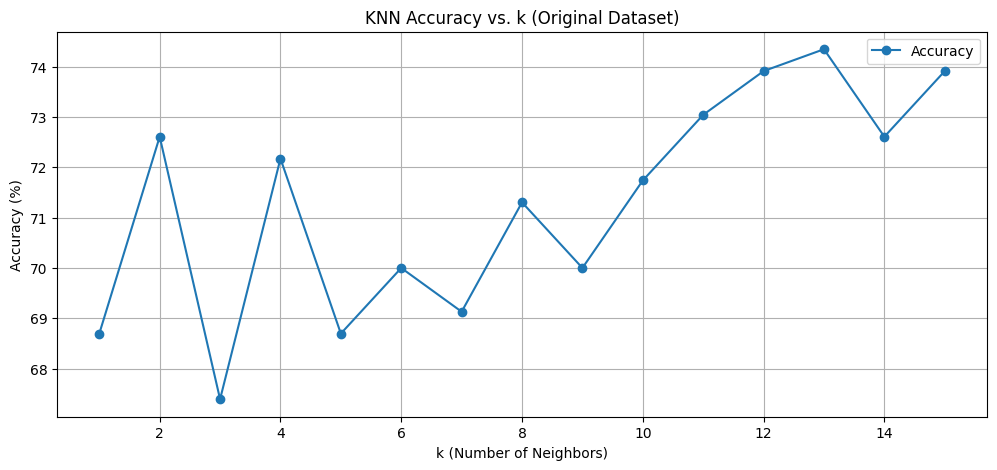

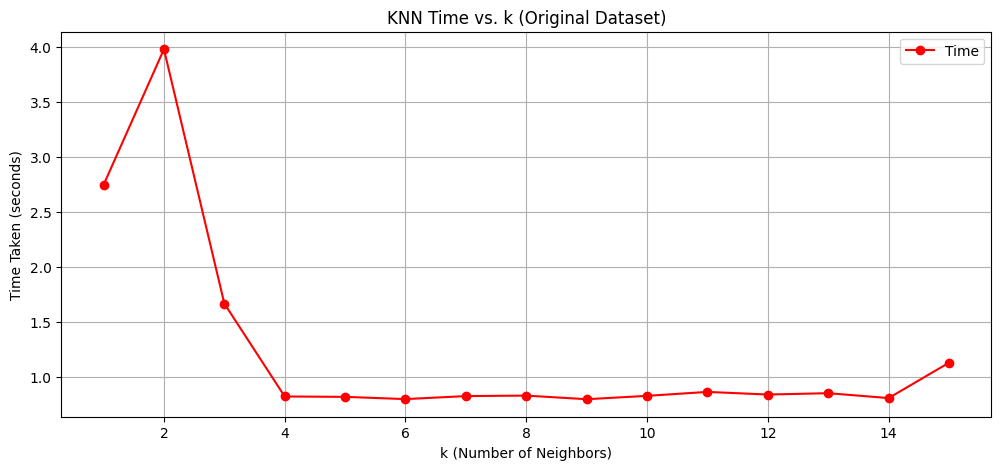


Experimenting on Scaled Dataset:
k=1: Accuracy=63.48%, Time=1.4388 seconds
k=2: Accuracy=66.09%, Time=1.4573 seconds
k=3: Accuracy=70.87%, Time=0.9139 seconds
k=4: Accuracy=68.70%, Time=0.8354 seconds
k=5: Accuracy=70.00%, Time=0.8132 seconds
k=6: Accuracy=69.13%, Time=0.8170 seconds
k=7: Accuracy=69.57%, Time=0.7978 seconds
k=8: Accuracy=68.70%, Time=0.7935 seconds
k=9: Accuracy=69.57%, Time=0.8256 seconds
k=10: Accuracy=69.57%, Time=0.8181 seconds
k=11: Accuracy=70.87%, Time=0.8408 seconds
k=12: Accuracy=72.17%, Time=0.8239 seconds
k=13: Accuracy=71.30%, Time=0.8020 seconds
k=14: Accuracy=71.30%, Time=0.8132 seconds
k=15: Accuracy=73.91%, Time=1.1398 seconds


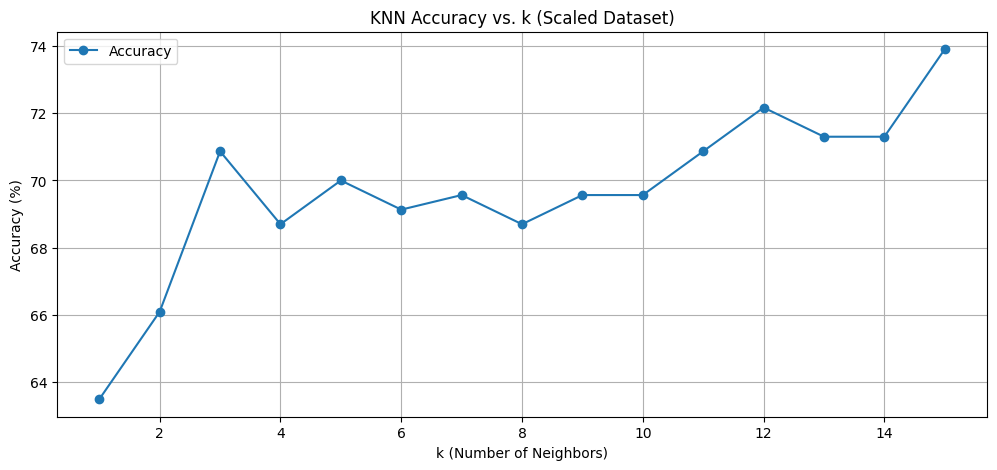

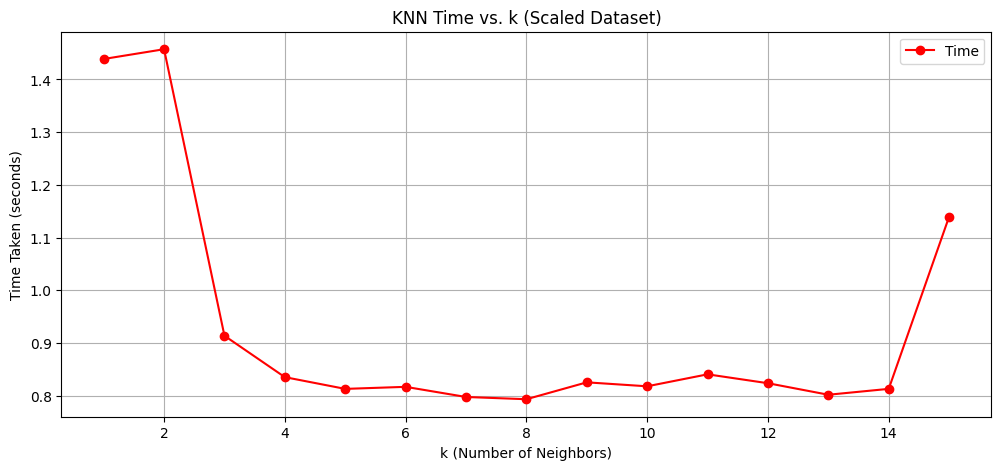

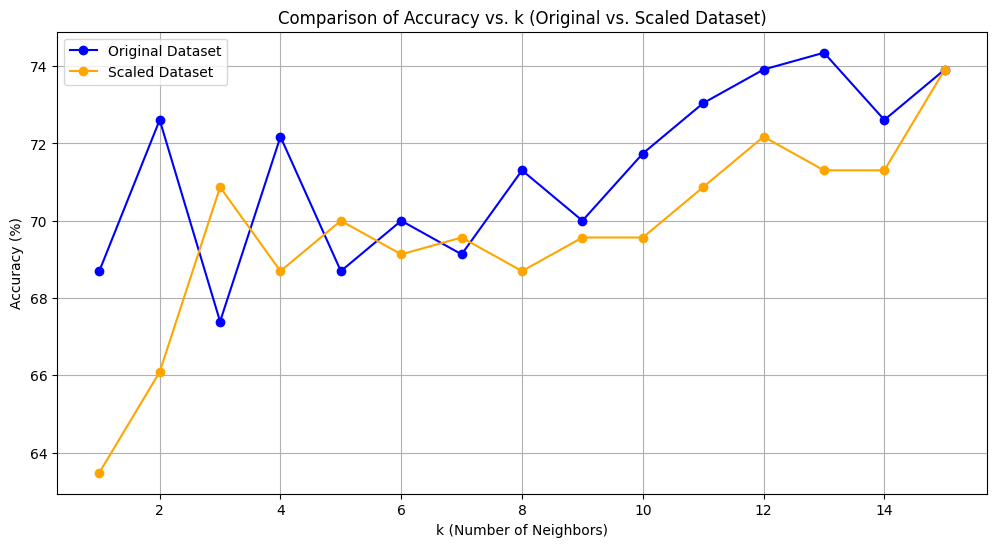

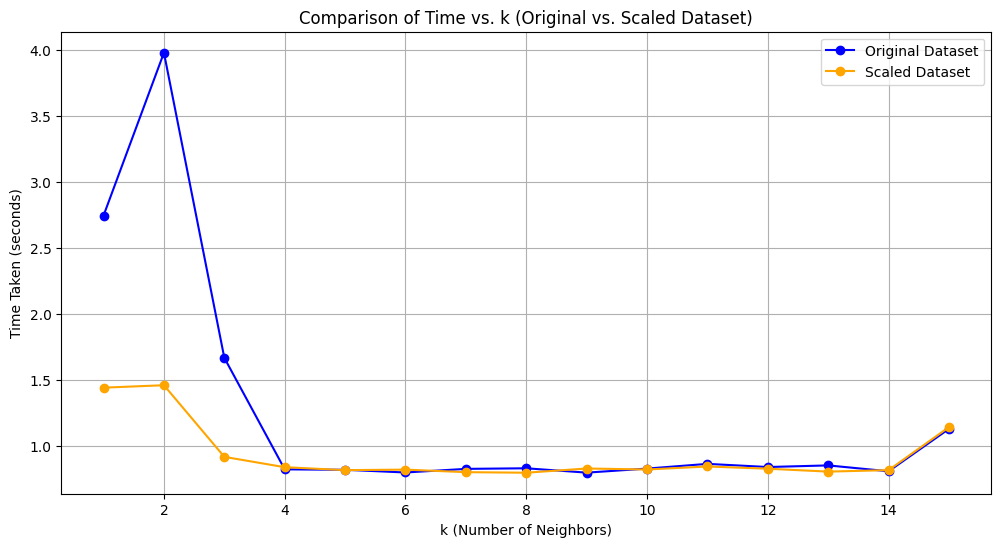

Optimal k for original dataset: 13
Optimal k for scaled dataset: 15
Scaling did not significantly improve the performance of KNN.


In [15]:
import time

def experiment_with_k(X_train, y_train, X_test, y_test, k_values, scaled=False):
    """
    Experiment with different values of k for the KNN algorithm.

    Arguments:
    X_train : np.ndarray
        Training feature matrix.
    y_train : np.ndarray
        Training labels.
    X_test : np.ndarray
        Test feature matrix.
    y_test : np.ndarray
        Test labels.
    k_values : list of int
        List of k values to experiment with.
    scaled : bool
        Whether the dataset is scaled (for labeling plots).

    Returns:
    dict
        A dictionary with k values as keys and a tuple of (accuracy, time taken) as values.
    """
    results = {}

    for k in k_values:
        start_time = time.time()
        predictions = knn_predict(X_test, X_train, y_train, k)
        elapsed_time = time.time() - start_time
        accuracy = compute_accuracy(y_test, predictions)
        results[k] = (accuracy, elapsed_time)
        print(f"k={k}: Accuracy={accuracy:.2f}%, Time={elapsed_time:.4f} seconds")

    # Plot accuracy
    plt.figure(figsize=(12, 5))
    plt.plot(k_values, [results[k][0] for k in k_values], marker='o', label="Accuracy")
    plt.xlabel("k (Number of Neighbors)")
    plt.ylabel("Accuracy (%)")
    plt.title(f"KNN Accuracy vs. k ({'Scaled' if scaled else 'Original'} Dataset)")
    plt.grid(True)
    plt.legend()
    plt.show()

    # Plot time
    plt.figure(figsize=(12, 5))
    plt.plot(k_values, [results[k][1] for k in k_values], marker='o', color="red", label="Time")
    plt.xlabel("k (Number of Neighbors)")
    plt.ylabel("Time Taken (seconds)")
    plt.title(f"KNN Time vs. k ({'Scaled' if scaled else 'Original'} Dataset)")
    plt.grid(True)
    plt.legend()
    plt.show()

    return results

# Step 1: Experiment on the Original Dataset
k_values = range(1, 16)  # k=1 to k=15
print("Experimenting on Original Dataset:")
results_original = experiment_with_k(X_train, y_train, X_test, y_test, k_values, scaled=False)

# Step 2: Experiment on the Scaled Dataset
print("\nExperimenting on Scaled Dataset:")
results_scaled = experiment_with_k(X_train_scaled, y_train, X_test_scaled, y_test, k_values, scaled=True)

# Step 3: Comparative Analysis
accuracies_original = [results_original[k][0] for k in k_values]
accuracies_scaled = [results_scaled[k][0] for k in k_values]
time_original = [results_original[k][1] for k in k_values]
time_scaled = [results_scaled[k][1] for k in k_values]

plt.figure(figsize=(12, 6))
plt.plot(k_values, accuracies_original, marker='o', label="Original Dataset", color='blue')
plt.plot(k_values, accuracies_scaled, marker='o', label="Scaled Dataset", color='orange')
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy (%)")
plt.title("Comparison of Accuracy vs. k (Original vs. Scaled Dataset)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(k_values, time_original, marker='o', label="Original Dataset", color='blue')
plt.plot(k_values, time_scaled, marker='o', label="Scaled Dataset", color='orange')
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Time Taken (seconds)")
plt.title("Comparison of Time vs. k (Original vs. Scaled Dataset)")
plt.legend()
plt.grid(True)
plt.show()

# Step 4: Discussion
optimal_k_original = k_values[np.argmax(accuracies_original)]
optimal_k_scaled = k_values[np.argmax(accuracies_scaled)]

print(f"Optimal k for original dataset: {optimal_k_original}")
print(f"Optimal k for scaled dataset: {optimal_k_scaled}")

if max(accuracies_scaled) > max(accuracies_original):
    print("Scaling improved the overall performance of KNN.")
else:
    print("Scaling did not significantly improve the performance of KNN.")


##Problem - 4 - Additional Questions {Optional - But Highly Recommended}:

• Discuss the challenges of using KNN for large datasets and high-dimensional data.

• Suggest strategies to improve the efficiency of KNN (e.g., approximate nearest neighbors, dimensionality
reduction).



**Impact of Choosing k**: The number of neighbors \( k \) in KNN has a significant effect on both accuracy and computational cost. A small \( k \) value may lead to overfitting because the model is too sensitive to individual data points, while a large \( k \) value can result in underfitting by smoothing out the distinctions between different classes. Computationally, smaller \( k \) values require more calculations per prediction since each point needs to compare distances to all neighbors. Larger \( k \) values reduce this computational burden slightly, but still require calculating distances for multiple neighbors, which can slow down the model, especially on larger datasets.

**Optimal k**: From the experiments conducted, the optimal number of neighbors \( k \) depends on the dataset. For the original data, the best \( k \) was found to be 13, achieving around 73% accuracy. When the data was scaled, the best \( k \) increased to 15, resulting in a slight increase in accuracy to 74%. Choosing the optimal \( k \) helps balance the bias-variance trade-off, where small \( k \) values might overfit the model and large \( k \) values may underfit it. Therefore, careful selection of \( k \) through experimentation is key to improving KNN performance.

**Challenges of KNN for Large Datasets and High-Dimensional Data**: KNN faces significant challenges when applied to large datasets and high-dimensional data. With large datasets, the model becomes slow because it has to compute the distance between a new point and all points in the training set, which is computationally expensive. It also requires significant memory to store the entire dataset. In high-dimensional spaces, the "curse of dimensionality" reduces the effectiveness of distance metrics because the differences between points become less meaningful as the number of features increases, leading to degraded performance. This makes KNN less efficient as dimensionality grows.

**Strategies to Improve KNN Efficiency**: To improve the efficiency of KNN, several strategies can be applied. One effective method is using Approximate Nearest Neighbors (ANN) techniques, such as KD-Trees or Locality Sensitive Hashing (LSH), which speed up the process of finding nearest neighbors. Dimensionality reduction techniques like PCA can be used to reduce the number of features, helping KNN focus on the most important variables, thus improving both speed and accuracy. Additionally, Weighted KNN, where closer neighbors are given more importance, can enhance model performance by reducing the impact of distant or less relevant neighbors.

